<a href="https://colab.research.google.com/github/LeandroCoelhos/case_house_prices/blob/main/house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

In [2]:
treino = pd.read_csv('https://raw.githubusercontent.com/LeandroCoelhos/case_house_prices/main/train.csv')
teste = pd.read_csv('https://raw.githubusercontent.com/LeandroCoelhos/case_house_prices/main/test.csv')

In [3]:
treino.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
treino.shape, teste.shape

((1460, 81), (1459, 80))

## Interpretação das variáveis e Engenharia de Features

Esse conjunto de dados demanda uma interpretação das variáveis, vendo o que é possivel ser tranformado em variáveis numéricas que façam sentido para um modelo de regressão linear

Explorar em uma etapa futura

In [5]:
#treino.info()

In [6]:
'''colunas = treino.columns
for col in colunas:
  print('\n',col)
  display(treino[col].value_counts(dropna=False))'''

"colunas = treino.columns\nfor col in colunas:\n  print('\n',col)\n  display(treino[col].value_counts(dropna=False))"

# Vizualizar variável resposta

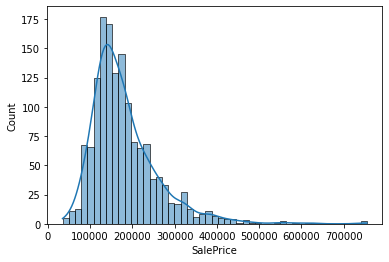

In [7]:
#visualizando a distribuição da nossa variavel target Preco de venda 
sns.histplot(treino['SalePrice'],kde = True)
plt.show()

## Transformação da variavel resposta para se ajustar com escala logaritmica

In [8]:
#treino['SalePrice'] = np.log1p(treino.SalePrice)
#sns.histplot(treino['SalePrice'],kde = True)
#plt.show()

# Verificar dados faltantes


In [9]:
treino.isnull().mean().sort_values(ascending=False)

PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
FireplaceQu    0.472603
                 ...   
ExterQual      0.000000
Exterior2nd    0.000000
Exterior1st    0.000000
RoofMatl       0.000000
SalePrice      0.000000
Length: 81, dtype: float64

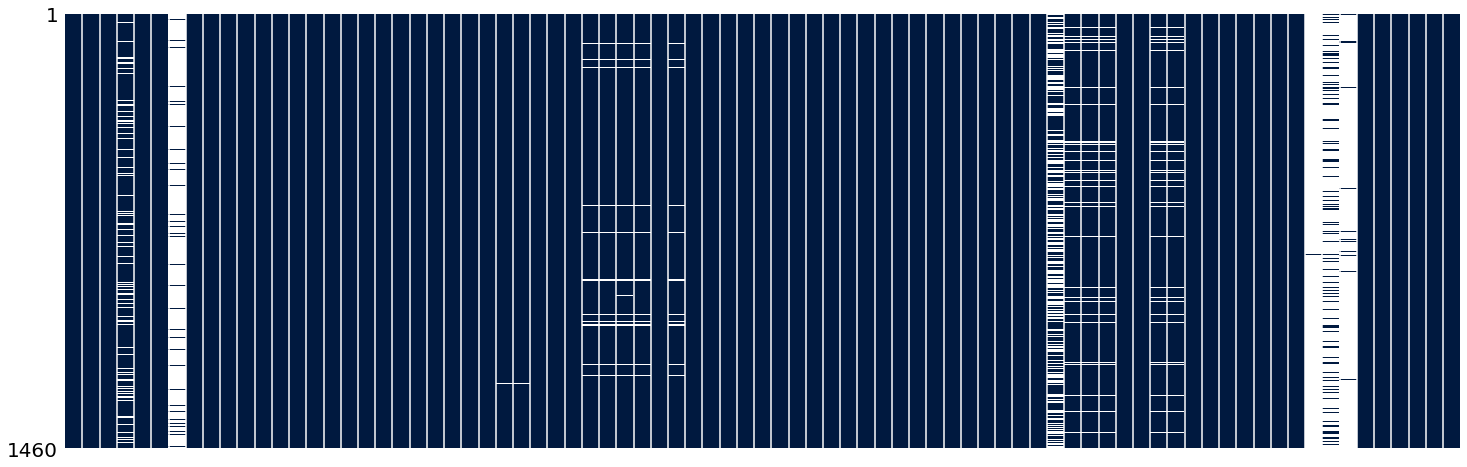

In [10]:
#Podemos vizualizar nossos dados faltantes
msno.matrix(treino, figsize = (25, 8), color = (0, 0.1, 0.25), sparkline = False);

# Abordagem Simplista

Pegar apenas as features numéricas

In [11]:
col_numericas = list(treino.dtypes[treino.dtypes != 'object'].index)

In [12]:
df = treino[col_numericas]
df = df.dropna()#retirar nulos
df = df.drop(columns=['Id'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1121 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1121 non-null   int64  
 1   LotFrontage    1121 non-null   float64
 2   LotArea        1121 non-null   int64  
 3   OverallQual    1121 non-null   int64  
 4   OverallCond    1121 non-null   int64  
 5   YearBuilt      1121 non-null   int64  
 6   YearRemodAdd   1121 non-null   int64  
 7   MasVnrArea     1121 non-null   float64
 8   BsmtFinSF1     1121 non-null   int64  
 9   BsmtFinSF2     1121 non-null   int64  
 10  BsmtUnfSF      1121 non-null   int64  
 11  TotalBsmtSF    1121 non-null   int64  
 12  1stFlrSF       1121 non-null   int64  
 13  2ndFlrSF       1121 non-null   int64  
 14  LowQualFinSF   1121 non-null   int64  
 15  GrLivArea      1121 non-null   int64  
 16  BsmtFullBath   1121 non-null   int64  
 17  BsmtHalfBath   1121 non-null   int64  
 18  FullBath

# Ver correlação de Pearson com Headtmap

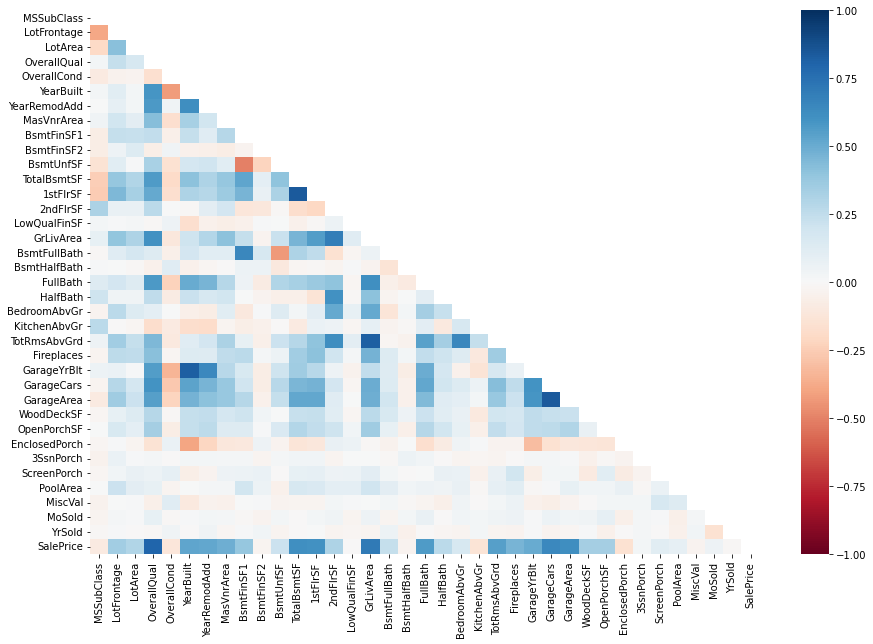

In [14]:
# Plotando a matriz de correlações usando um Heatmap para dar cor aos números
plt.figure(figsize=(15,10))
sns.heatmap(
    df.corr(), #Fonte dos dados, nossa matriz de correlação
    cmap='RdBu', # Mapa de cores do vermelho (menor) para o azul (maior)
    vmin=-1, vmax=1, #seta os valores Máximos e mínimos dos eixos
    mask=np.triu( # Faz uma matriz triangular
        np.ones_like(df.corr()) # usando como base uma matriz de '1's, do mesmo tamanho que a matriz de correlação
    ) # A máscara vai então 'apagar' a diagonal superior da matriz
           )
plt.show()

A Alta correlação no nosso conjunto de dados fere diretamente nossa hipótese para aplicar a regressão Linear de que nossos dados são independentes, além de ser muito prejudicial na determinação dos coeficientes da nossa regressão, pois um pode anular o peso do outro na nossa predição do y

In [15]:
#Podemos listar a correlação com nossa variável resposta
corr_matrix = df.corr()
corr_matrix['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.797881
GrLivArea        0.705154
GarageCars       0.647034
GarageArea       0.619330
TotalBsmtSF      0.615612
1stFlrSF         0.607969
FullBath         0.566627
TotRmsAbvGrd     0.547067
YearBuilt        0.525394
YearRemodAdd     0.521253
GarageYrBlt      0.504753
MasVnrArea       0.488658
Fireplaces       0.461873
BsmtFinSF1       0.390301
LotFrontage      0.344270
OpenPorchSF      0.343354
WoodDeckSF       0.336855
2ndFlrSF         0.306879
LotArea          0.299962
HalfBath         0.268560
BsmtFullBath     0.236737
BsmtUnfSF        0.213129
BedroomAbvGr     0.166814
ScreenPorch      0.110427
PoolArea         0.092488
MoSold           0.051568
3SsnPorch        0.030777
LowQualFinSF    -0.001482
YrSold          -0.011869
BsmtFinSF2      -0.028021
MiscVal         -0.036041
BsmtHalfBath    -0.036513
MSSubClass      -0.088032
OverallCond     -0.124391
KitchenAbvGr    -0.140497
EnclosedPorch   -0.154843
Name: SalePrice, dtype: float64

# Pairplot

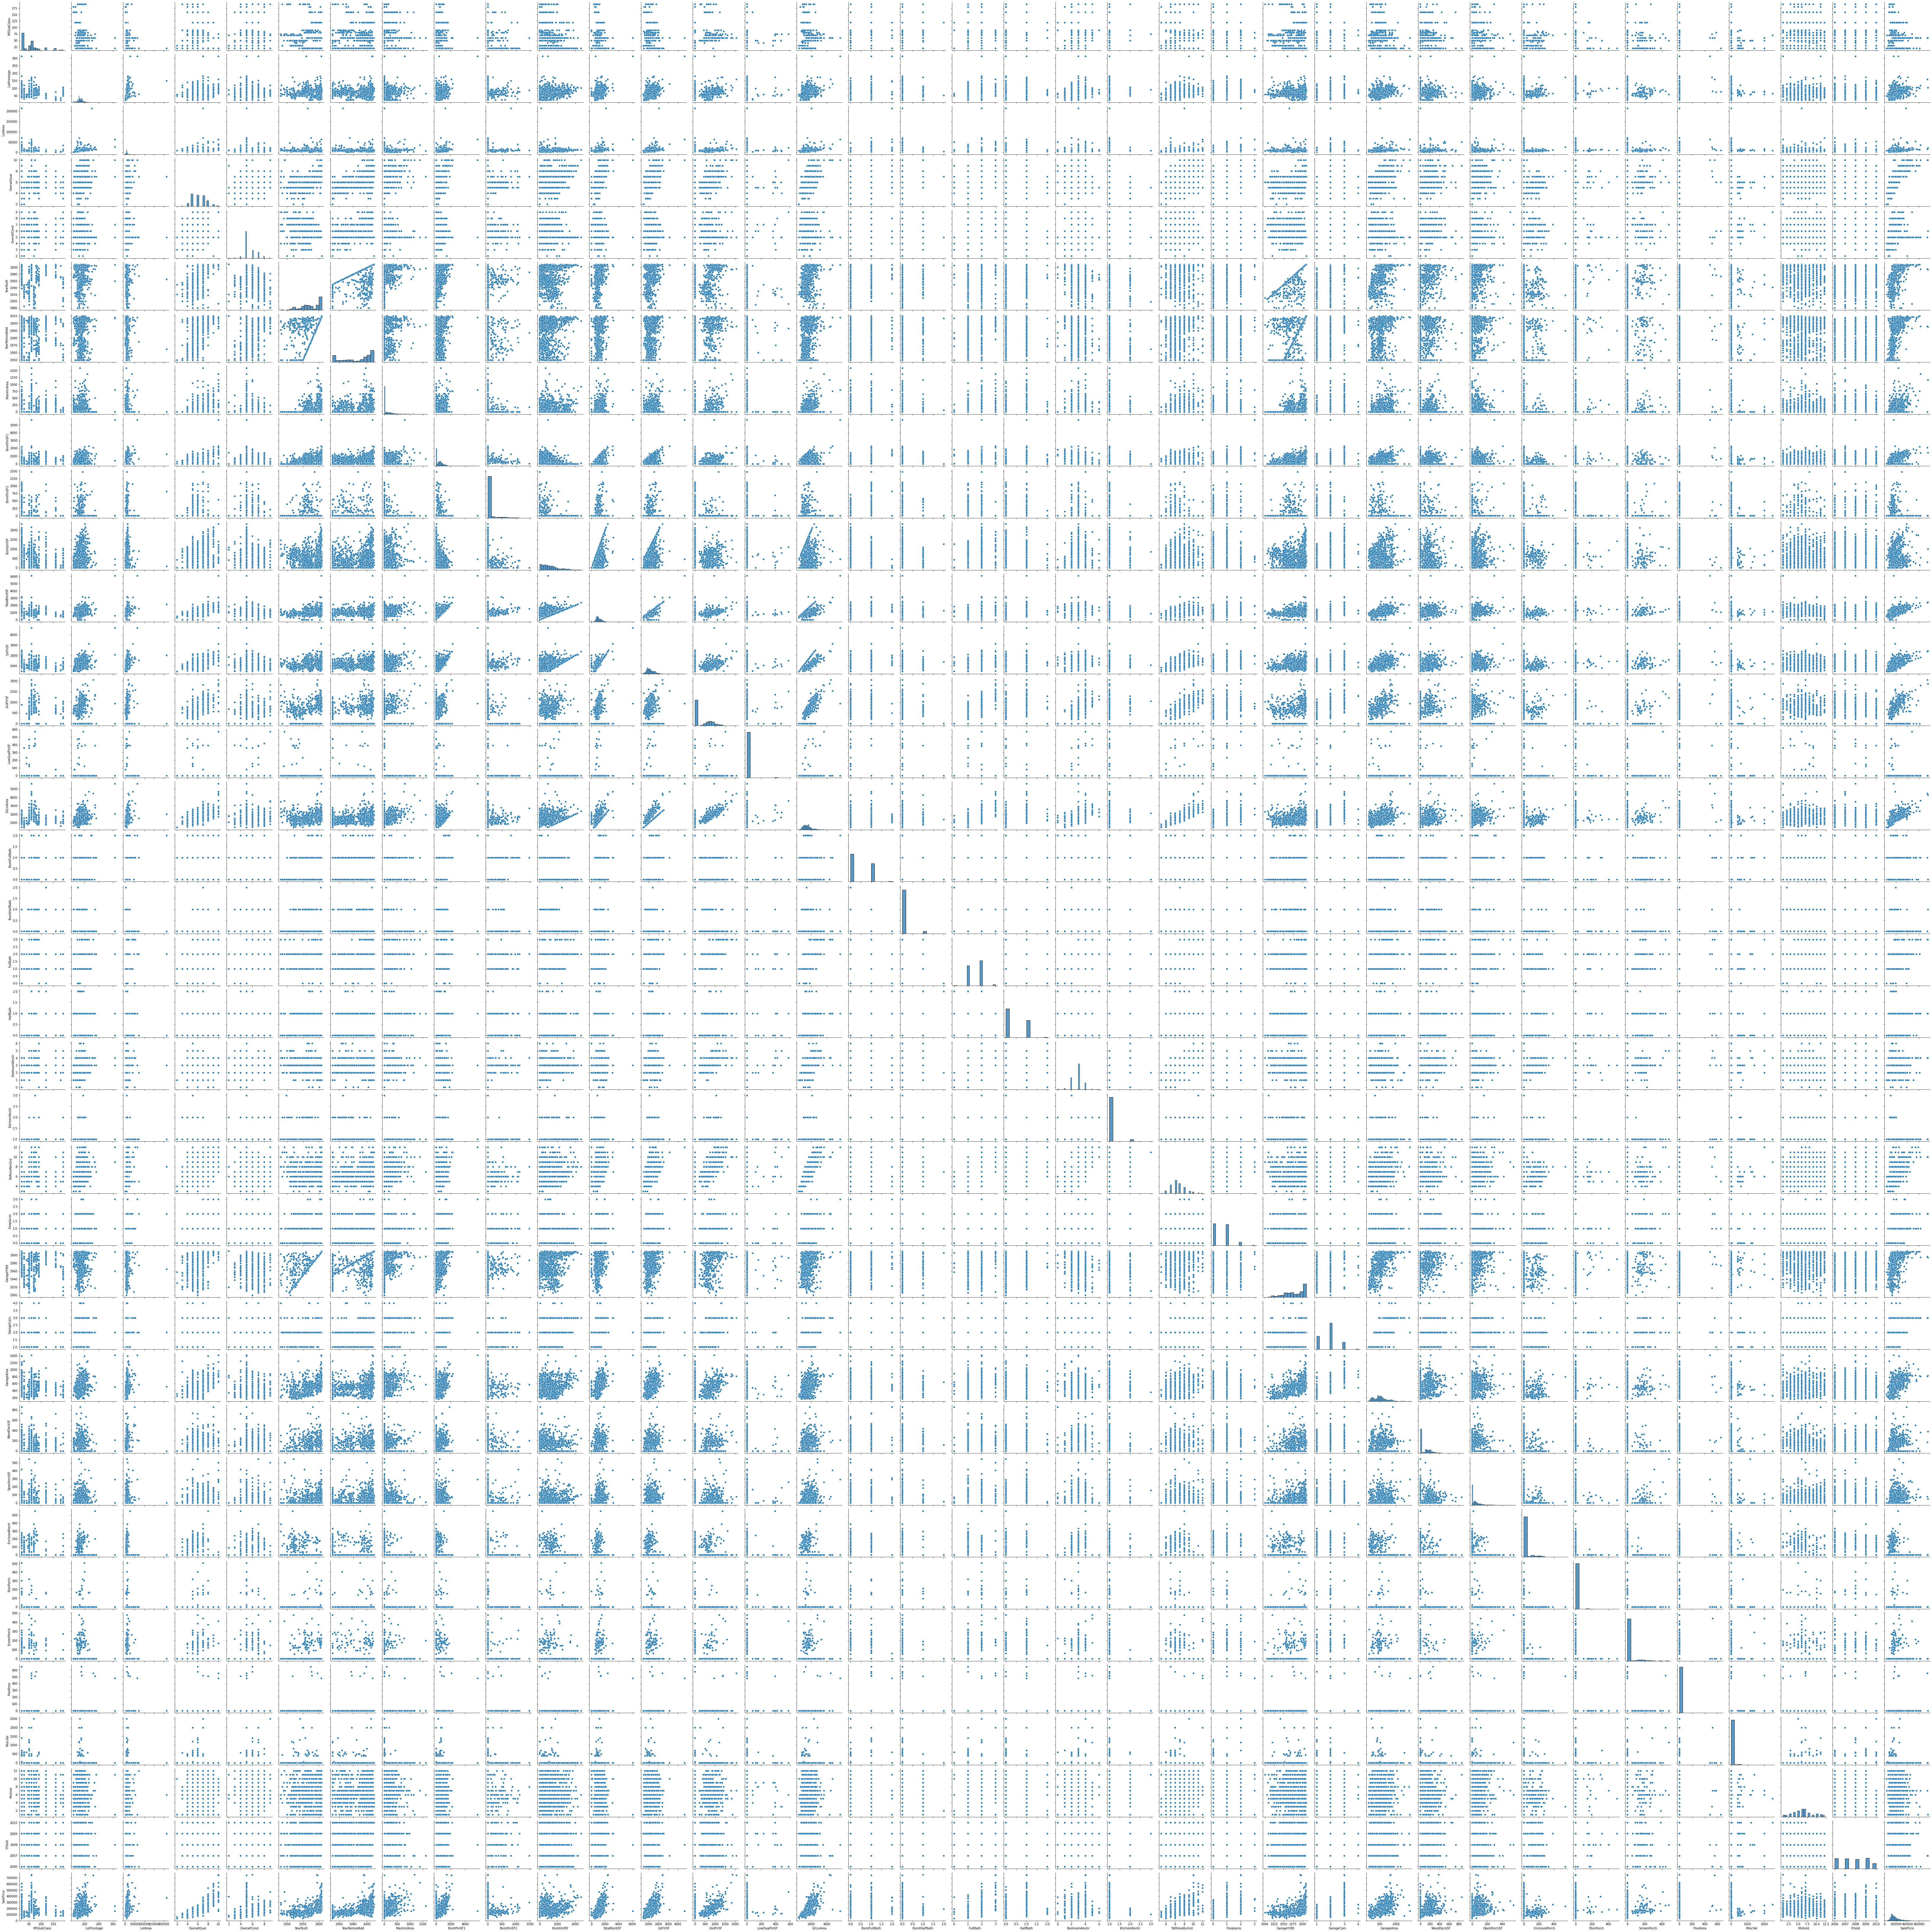

In [16]:
sns.pairplot(df)

In [18]:
x = df.drop(columns=['SalePrice'])
y = df['SalePrice']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
#dividindo entre teste e treino 
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y ,test_size = 0.30, random_state= 1603)
x_treino.shape, x_teste.shape

((784, 36), (337, 36))

In [35]:
from sklearn.linear_model import Ridge, ElasticNet, Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [26]:
lr = LinearRegression(fit_intercept=True, n_jobs = -1)
lr.fit(x_treino,y_treino) #treinando o modelo

LinearRegression(n_jobs=-1)

In [30]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error

y_treino_pred = lr.predict(x_treino)
y_pred = lr.predict(x_teste)
err_treino = mean_absolute_error(y_treino, y_treino_pred)
err_teste = mean_absolute_error(y_teste, y_pred)

print(f'Erro treino: {err_treino}\nErro teste: {err_teste}')

Erro treino: 20622.859943964908
Erro teste: 27043.794351346492


In [37]:
lr.feature_names_in_
lr.coef_

array([-1.60682977e+02, -1.51506211e+02,  1.12801025e+00,  1.80621406e+04,
        5.82178801e+03,  3.93837780e+02,  1.43160320e+02,  3.65479647e+01,
        6.14299316e+00, -3.55095534e+00,  1.28998268e+00,  6.96098457e-01,
        3.77800212e+01,  3.56217658e+01,  7.40573581e+01,  5.50651224e+00,
        1.27638945e+04,  2.94298337e+03,  5.13336750e+03, -1.42516964e+03,
       -6.27332464e+03, -1.56247851e+04,  3.44771063e+03,  4.49581560e+03,
       -1.05790266e+02,  1.54414549e+04,  8.43009737e+00,  3.38480131e+01,
        5.22042310e+01,  4.07911202e+01,  1.28873177e+01,  5.91671129e+01,
       -2.46474474e+02,  3.48046797e+00,  3.01163408e+02, -7.28173788e+02])

In [32]:
lr = Ridge(fit_intercept=True)
lr.fit(x_treino,y_treino) #treinando o modelo

y_treino_pred = lr.predict(x_treino)
y_pred = lr.predict(x_teste)
err_treino = mean_absolute_error(y_treino, y_treino_pred)
err_teste = mean_absolute_error(y_teste, y_pred)

print(f'Erro treino: {err_treino}\nErro teste: {err_teste}')

Erro treino: 20610.262254871657
Erro teste: 27048.188241622924


In [38]:
lr.feature_names_in_
lr.coef_

array([-1.60682977e+02, -1.51506211e+02,  1.12801025e+00,  1.80621406e+04,
        5.82178801e+03,  3.93837780e+02,  1.43160320e+02,  3.65479647e+01,
        6.14299316e+00, -3.55095534e+00,  1.28998268e+00,  6.96098457e-01,
        3.77800212e+01,  3.56217658e+01,  7.40573581e+01,  5.50651224e+00,
        1.27638945e+04,  2.94298337e+03,  5.13336750e+03, -1.42516964e+03,
       -6.27332464e+03, -1.56247851e+04,  3.44771063e+03,  4.49581560e+03,
       -1.05790266e+02,  1.54414549e+04,  8.43009737e+00,  3.38480131e+01,
        5.22042310e+01,  4.07911202e+01,  1.28873177e+01,  5.91671129e+01,
       -2.46474474e+02,  3.48046797e+00,  3.01163408e+02, -7.28173788e+02])

In [36]:
lr = Lasso(fit_intercept=True)
lr.fit(x_treino,y_treino) #treinando o modelo

y_treino_pred = lr.predict(x_treino)
y_pred = lr.predict(x_teste)
err_treino = mean_absolute_error(y_treino, y_treino_pred)
err_teste = mean_absolute_error(y_teste, y_pred)

print(f'Erro treino: {err_treino}\nErro teste: {err_teste}')

Erro treino: 20621.90013514478
Erro teste: 27044.069166199766


In [39]:
lr.feature_names_in_
lr.coef_

array([-1.60682977e+02, -1.51506211e+02,  1.12801025e+00,  1.80621406e+04,
        5.82178801e+03,  3.93837780e+02,  1.43160320e+02,  3.65479647e+01,
        6.14299316e+00, -3.55095534e+00,  1.28998268e+00,  6.96098457e-01,
        3.77800212e+01,  3.56217658e+01,  7.40573581e+01,  5.50651224e+00,
        1.27638945e+04,  2.94298337e+03,  5.13336750e+03, -1.42516964e+03,
       -6.27332464e+03, -1.56247851e+04,  3.44771063e+03,  4.49581560e+03,
       -1.05790266e+02,  1.54414549e+04,  8.43009737e+00,  3.38480131e+01,
        5.22042310e+01,  4.07911202e+01,  1.28873177e+01,  5.91671129e+01,
       -2.46474474e+02,  3.48046797e+00,  3.01163408e+02, -7.28173788e+02])